In [1]:
import pandas as pd
import geopandas as gpd #used for transforming geolocation data
import matplotlib.pyplot as plt
import json


from datetime import datetime  #to convert data to datetime that does not fall within the pandas.to_datetime function timeframe
from shapely.geometry import Point  #transform latitude/longitude to geo-coordinate data
from geopandas.tools import geocode #get the latitude/longitude for a given address
from geopandas.tools import reverse_geocode  #get the address for a location using latitude/longitude

%matplotlib inline

In [2]:
michaeldf = pd.read_csv("datasets/hurricaneMichael.csv")
michaeldf

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/6/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven
1,1A,10/6/2018 20:00,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila
2,2,10/6/2018 23:00,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila
3,2A,10/7/2018 2:00,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg
4,3,10/7/2018 5:00,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg
5,3A,10/7/2018 8:00,18.9,86.8,35,1004,N at 3 MPH (360 deg),Tropical Depression,FOURTEEN,10/7/2018 7:53,Brown
6,4,10/7/2018 11:00,19.2,86.9,35,1004,N at 6 MPH (360 deg),Tropical Depression,FOURTEEN,10/7/2018 10:53,Brown
7,4A,10/7/2018 14:00,19.2,86.9,40,1004,Stationary,Tropical Storm,Michael,10/7/2018 13:44,Brown
8,5,10/7/2018 17:00,19.2,85.5,50,999,NNE at 3 MPH (20 deg),Tropical Storm,Michael,10/7/2018 17:02,Brown
9,5A,10/7/2018 20:00,19.9,85.4,60,997,N at 5 MPH (5 deg),Tropical Storm,Michael,10/7/2018 19:41,Stewart


In [3]:
michaeldf.count()

AdvisoryNumber    45
Date              45
Lat               45
Long              45
Wind              45
Pres              45
Movement          45
Type              45
Name              45
Received          45
Forecaster        45
dtype: int64

In [4]:
michaeldf = michaeldf.loc[(michaeldf['Lat'].notnull())]
michaeldf.count()

AdvisoryNumber    45
Date              45
Lat               45
Long              45
Wind              45
Pres              45
Movement          45
Type              45
Name              45
Received          45
Forecaster        45
dtype: int64

In [5]:
michaeldf['Long'] = 0 - michaeldf['Long']

In [6]:
michaeldf

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/6/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven
1,1A,10/6/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila
2,2,10/6/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila
3,2A,10/7/2018 2:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg
4,3,10/7/2018 5:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg
5,3A,10/7/2018 8:00,18.9,-86.8,35,1004,N at 3 MPH (360 deg),Tropical Depression,FOURTEEN,10/7/2018 7:53,Brown
6,4,10/7/2018 11:00,19.2,-86.9,35,1004,N at 6 MPH (360 deg),Tropical Depression,FOURTEEN,10/7/2018 10:53,Brown
7,4A,10/7/2018 14:00,19.2,-86.9,40,1004,Stationary,Tropical Storm,Michael,10/7/2018 13:44,Brown
8,5,10/7/2018 17:00,19.2,-85.5,50,999,NNE at 3 MPH (20 deg),Tropical Storm,Michael,10/7/2018 17:02,Brown
9,5A,10/7/2018 20:00,19.9,-85.4,60,997,N at 5 MPH (5 deg),Tropical Storm,Michael,10/7/2018 19:41,Stewart


In [7]:
michaeldf['coordinates'] = list(michaeldf[['Long', 'Lat']].values)
michaeldf

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/6/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven,"[-86.6, 18.0]"
1,1A,10/6/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila,"[-86.6, 18.3]"
2,2,10/6/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila,"[-86.6, 18.8]"
3,2A,10/7/2018 2:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg,"[-87.1, 18.4]"
4,3,10/7/2018 5:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg,"[-86.9, 18.6]"
5,3A,10/7/2018 8:00,18.9,-86.8,35,1004,N at 3 MPH (360 deg),Tropical Depression,FOURTEEN,10/7/2018 7:53,Brown,"[-86.8, 18.9]"
6,4,10/7/2018 11:00,19.2,-86.9,35,1004,N at 6 MPH (360 deg),Tropical Depression,FOURTEEN,10/7/2018 10:53,Brown,"[-86.9, 19.2]"
7,4A,10/7/2018 14:00,19.2,-86.9,40,1004,Stationary,Tropical Storm,Michael,10/7/2018 13:44,Brown,"[-86.9, 19.2]"
8,5,10/7/2018 17:00,19.2,-85.5,50,999,NNE at 3 MPH (20 deg),Tropical Storm,Michael,10/7/2018 17:02,Brown,"[-85.5, 19.2]"
9,5A,10/7/2018 20:00,19.9,-85.4,60,997,N at 5 MPH (5 deg),Tropical Storm,Michael,10/7/2018 19:41,Stewart,"[-85.4, 19.9]"


In [8]:
michaeldf['coordinates'].dtypes

dtype('O')

In [9]:
michaeldf['coordinates'] = michaeldf['coordinates'].apply(Point)
michaeldf

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/6/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven,POINT (-86.59999999999999 18)
1,1A,10/6/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila,POINT (-86.59999999999999 18.3)
2,2,10/6/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila,POINT (-86.59999999999999 18.8)
3,2A,10/7/2018 2:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg,POINT (-87.09999999999999 18.4)
4,3,10/7/2018 5:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg,POINT (-86.90000000000001 18.6)
5,3A,10/7/2018 8:00,18.9,-86.8,35,1004,N at 3 MPH (360 deg),Tropical Depression,FOURTEEN,10/7/2018 7:53,Brown,POINT (-86.8 18.9)
6,4,10/7/2018 11:00,19.2,-86.9,35,1004,N at 6 MPH (360 deg),Tropical Depression,FOURTEEN,10/7/2018 10:53,Brown,POINT (-86.90000000000001 19.2)
7,4A,10/7/2018 14:00,19.2,-86.9,40,1004,Stationary,Tropical Storm,Michael,10/7/2018 13:44,Brown,POINT (-86.90000000000001 19.2)
8,5,10/7/2018 17:00,19.2,-85.5,50,999,NNE at 3 MPH (20 deg),Tropical Storm,Michael,10/7/2018 17:02,Brown,POINT (-85.5 19.2)
9,5A,10/7/2018 20:00,19.9,-85.4,60,997,N at 5 MPH (5 deg),Tropical Storm,Michael,10/7/2018 19:41,Stewart,POINT (-85.40000000000001 19.9)


In [10]:
geo_michael = gpd.GeoDataFrame(michaeldf, geometry='coordinates')
geo_michael

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/6/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven,POINT (-86.59999999999999 18)
1,1A,10/6/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila,POINT (-86.59999999999999 18.3)
2,2,10/6/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila,POINT (-86.59999999999999 18.8)
3,2A,10/7/2018 2:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg,POINT (-87.09999999999999 18.4)
4,3,10/7/2018 5:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg,POINT (-86.90000000000001 18.6)
5,3A,10/7/2018 8:00,18.9,-86.8,35,1004,N at 3 MPH (360 deg),Tropical Depression,FOURTEEN,10/7/2018 7:53,Brown,POINT (-86.8 18.9)
6,4,10/7/2018 11:00,19.2,-86.9,35,1004,N at 6 MPH (360 deg),Tropical Depression,FOURTEEN,10/7/2018 10:53,Brown,POINT (-86.90000000000001 19.2)
7,4A,10/7/2018 14:00,19.2,-86.9,40,1004,Stationary,Tropical Storm,Michael,10/7/2018 13:44,Brown,POINT (-86.90000000000001 19.2)
8,5,10/7/2018 17:00,19.2,-85.5,50,999,NNE at 3 MPH (20 deg),Tropical Storm,Michael,10/7/2018 17:02,Brown,POINT (-85.5 19.2)
9,5A,10/7/2018 20:00,19.9,-85.4,60,997,N at 5 MPH (5 deg),Tropical Storm,Michael,10/7/2018 19:41,Stewart,POINT (-85.40000000000001 19.9)


In [11]:
filepath = "datasets/US_states(5m).json"
map_df = gpd.read_file(filepath)
map_df

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
1,0400000US02,02,Alaska,,570640.950,"(POLYGON ((-166.10574 53.988606, -166.075283 5..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."
5,0400000US08,08,Colorado,,103641.888,"POLYGON ((-106.190554 40.997607, -106.061181 4..."
6,0400000US09,09,Connecticut,,4842.355,"POLYGON ((-71.79924200000001 42.008065, -71.79..."
7,0400000US10,10,Delaware,,1948.543,"(POLYGON ((-75.564927 39.583248, -75.576271000..."
8,0400000US11,11,District of Columbia,,61.048,"POLYGON ((-77.03859799999999 38.791513, -77.03..."
9,0400000US12,12,Florida,,53624.759,"(POLYGON ((-82.821585 27.964443, -82.829801 27..."


In [12]:
map48 = map_df.loc[map_df['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]
map48

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."
5,0400000US08,08,Colorado,,103641.888,"POLYGON ((-106.190554 40.997607, -106.061181 4..."
6,0400000US09,09,Connecticut,,4842.355,"POLYGON ((-71.79924200000001 42.008065, -71.79..."
7,0400000US10,10,Delaware,,1948.543,"(POLYGON ((-75.564927 39.583248, -75.576271000..."
8,0400000US11,11,District of Columbia,,61.048,"POLYGON ((-77.03859799999999 38.791513, -77.03..."
9,0400000US12,12,Florida,,53624.759,"(POLYGON ((-82.821585 27.964443, -82.829801 27..."
10,0400000US13,13,Georgia,,57513.485,"POLYGON ((-84.81047700000001 34.987607, -84.80..."


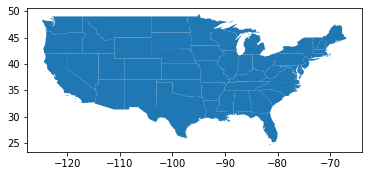

In [13]:
map48.plot()

Text(0.5, 1, 'Hurricane Michael Path')

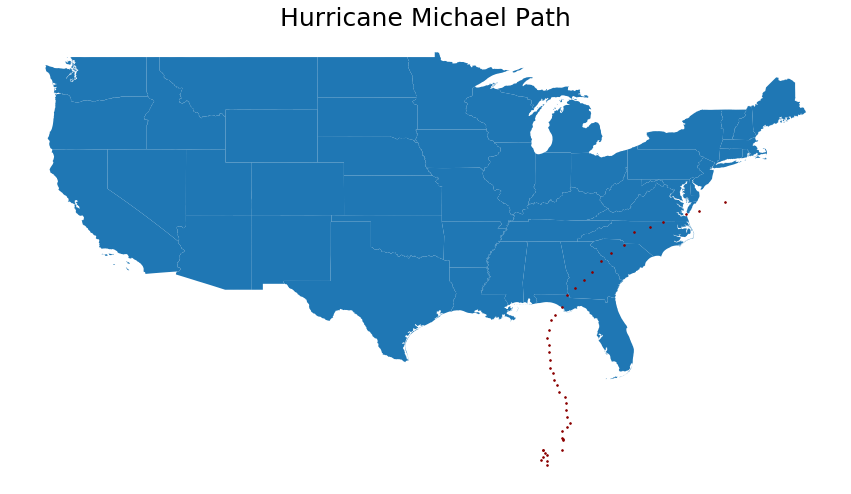

In [14]:
fig, ax = plt.subplots(1, figsize=(15,10))

#this is the map
basemap = map48.plot(ax=ax)

#plot coordinates on top of map graph
geo_michael.plot(ax=basemap, color='darkred', marker=".", markersize=10)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("Hurricane Michael Path", fontsize=25, fontweight=3)